### Probability density functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(rc={'figure.figsize':(11,8)})

#### Continuous variables
- Quantities that can take any value, not just discrete values

#### Probability density function (PDF)
- Continuous analog to the PMF
- Mathmatical description of the relative likelihood of observing a value of a continuous variable

### Introduction to the Normal distribution 
- Describes a continous variable whose PDF has a single symmetric peak
- The mean describes where the peak is and the STD describes how wide the peak is

In [3]:
# Checking Normality of Michelson data
michelson = pd.read_csv('michelson_speed_of_light.csv')
michelson

,Unnamed: 0,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles
2,2,June 7,2,72,114.58,0.074,114.50,0.08,1.533,-0.084,257.52,28.647,0.99614,299900,P.M. Frame inclined at various angles
3,3,June 7,2,72,85.91,0.074,85.84,0.12,1.533,-0.084,193.14,28.647,0.99598,300070,P.M. Frame inclined at various angles
4,4,June 7,2,72,85.97,0.074,85.89,O.07,1.533,-0.084,193.14,28.650,0.99598,299930,P.M. Frame inclined at various angles
5,5,June 7,2,72,114.61,0.074,114-53,0.07,1.533,-0.084,257.42,28.650,0.99614,299850,P.M. Frame inclined at various angles
6,6,June 9,3,83,114.54,0.074,114.47,0.07,1.533,-0.216,257.39,28.658,0.99614,299950,P.M. Frame inclined at various angles
7,7,June 9,3,83,114.54,0.074,114.46,0.10,1.533,-0.216,257.39,28.658,0.99614,299980,P.M. Frame inclined at various angles
8,8,June 9,3,83,114.57,0.074,114.47,0.08,1.533,-0.216,257.39,28.662,0.99614,299980,P.M. Frame inclined at various angles
9,9,June 9,3,83,114.57,0.074,114.50,0.06,1.533,-0.216,257.39,28.660,0.99614,299880,P.M. Frame inclined at various angles


In [4]:
michelson_speed_of_light = np.array(michelson['velocity of light in air (km/s)'])
#michelson_speed_of_light

In [5]:
def ecdf(data):
    '''Compute ECDF for a one-dimensional array of measurements'''
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x, y

In [6]:
mean = np.mean(michelson_speed_of_light)
std = np.std(michelson_speed_of_light)
samples = np.random.normal(mean, std, size=10000)
x, y = ecdf(michelson_speed_of_light)
x_thoer, y_theor = ecdf(samples)

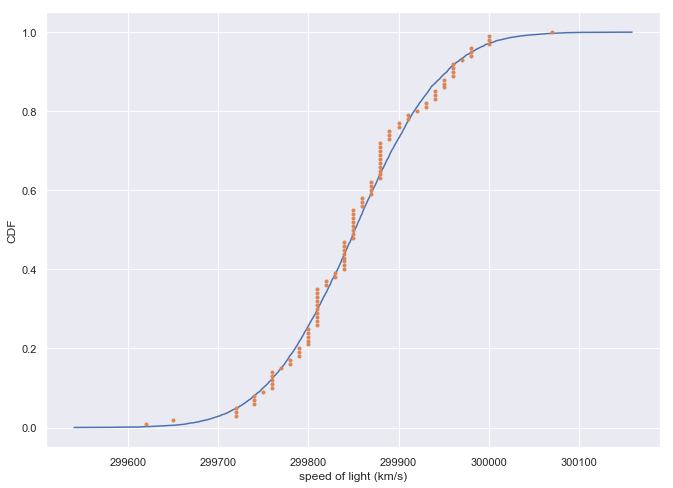

In [7]:
_ = plt.plot(x_thoer, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('speed of light (km/s)')
_ = plt.ylabel('CDF')
plt.show()

In [8]:
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

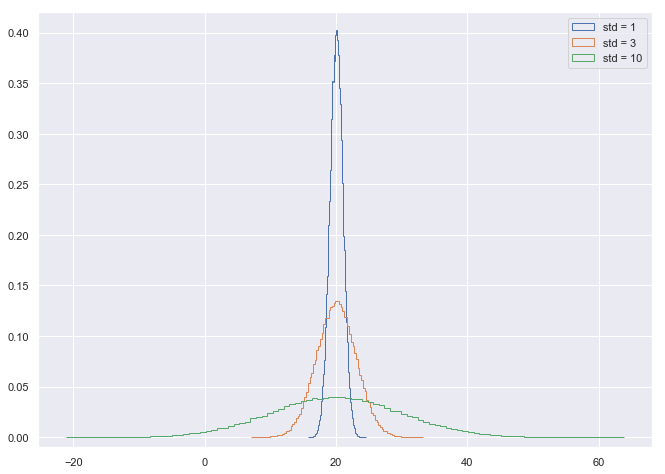

In [9]:
_ = plt.hist(samples_std1, normed=True, histtype='step', bins=100)
_ = plt.hist(samples_std3, normed=True, histtype='step', bins=100)
_ = plt.hist(samples_std10, normed=True, histtype='step', bins=100)
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

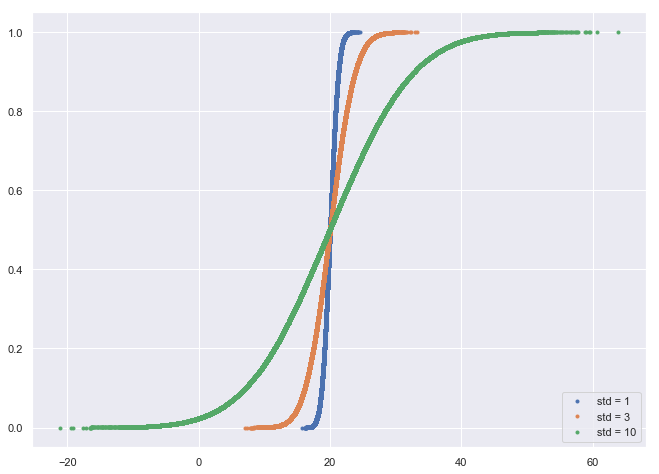

In [10]:
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

### The normal distribution: Properties and warnings

In [22]:
belmont = pd.read_csv('belmont.csv')
belmont.shape

(91, 8)

In [30]:
belmont_n_o = belmont.loc[(belmont['Year'] != 1973) & (belmont['Year'] != 1970)]['Time']
belmont_n_o.tail(), len(belmont_n_o)

(86    2:31.60
 87    2:32.80
 88    2:33.20
 89    2:32.40
 90    2:32.20
 Name: Time, dtype: object, 89)

In [40]:
belmont_n_o = pd.DatetimeIndex(belmont_n_o)
belmont_no_outliers = np.array(np.around(belmont_n_o.hour * 60 
                                         + belmont_n_o.minute 
                                         + (belmont_n_o.second/60),
                                         decimals = 2))
belmont_no_outliers

array([148.5 , 146.65, 148.52, 150.7 , 150.42, 150.87, 151.57, 147.53,
       149.65, 148.73, 147.85, 148.75, 147.5 , 148.25, 149.7 , 146.55,
       151.18, 147.87, 149.15, 148.82, 148.95, 152.02, 146.82, 149.97,
       146.12, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ])